# Bootcamp 11: Practice with `solve_ivp`

## 1. Modeling the Motion of a Spring

Let’s look at the motion of a spring. Spring motion follows one basic rule: *springs want to be a certain length. Stretching or compressing the spring away from its happy length makes the spring mad, and it will resist the change.* Mathematically, we can state this as:

$$\frac{dv}{dt} = -\frac{k}{m} (l - l_{\mathrm{unst}}) $$

Where
- $k$ is the spring constant. It determines how *stiff* the spring is. A larger $k$ means the spring will push (or pull) against you more.
- $m$ is the mass of the spring
- $l$ is the length of the spring
- $l_{\mathrm{unst}}$ is the unstretched length of the spring (it’s happy length)!

**NOTE** Remember from our work on Day 14 that this isn’t the only ODE we need to include in our model. We also need to include the equation for the change in *length*, that is:

$$\frac{dl}{dt} = v$$

Okay! Let’s model this motion!

&#9989;&nbsp; **Write a piece of code that models the motion of the spring.  You will need to set your initial variables, write a derivs function, and use it in a call to `solve_ivp`.** 

For values to plug into your equations (I.e., $k$, $m$, $l_{\mathrm{unst}}$, $v_0$ (initial velocity), $l_0$ (initial length)), pick your own! Anything between 0.5-2.0 should work just fine for any of the variables. 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.integrate import solve_ivp

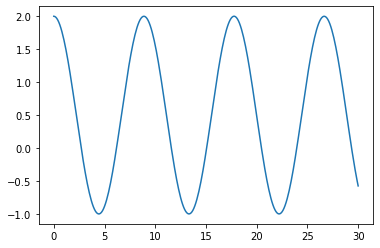

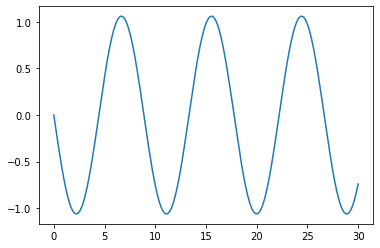

In [16]:
# Write your code here

#create a derivs function

def derivs(t,curr_vals, k, m, l_unst):
    l, v = curr_vals
    dldt=v
    dvdt=-(k/m)*(l-l_unst)
    return dldt, dvdt

#parameters
k=0.5
m=1.0
l_unst=0.5
#initial conditions
l0=2
v0=0

init=(l0,v0)
time=np.arange(0, 30.1, .1)

#use solve_ivp

soln=solve_ivp(derivs, (min(time), max(time)), init, t_eval=time, args=(k,m, l_unst))

l = soln.y[0,:]
v=soln.y[1,:]

plt.figure()
plt.plot(soln.t, l)

plt.figure()
plt.plot(time,v)


&#9989;&nbsp; **QUESTION** Try out several different values for the spring constant $l_{\mathrm{unst}}$. How does $l$ change when you vary $l_{\mathrm{unst}}$? How does the velocity of the spring change? (**Note** It may be helpful to overplot the motion (i.e., $l$) for different $l_{\mathrm{unst}}$ values on a single plot, so you can easily compare them).

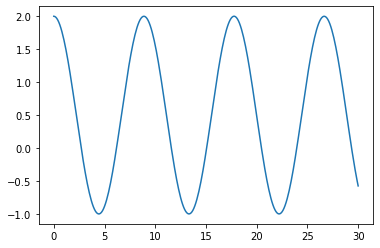

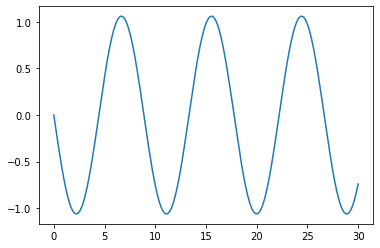

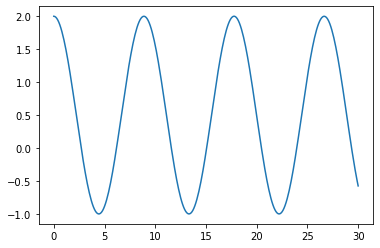

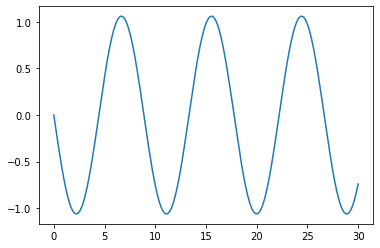

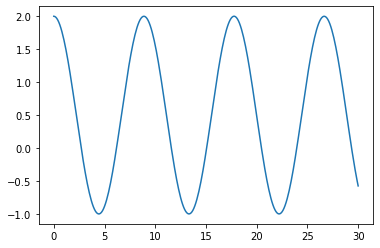

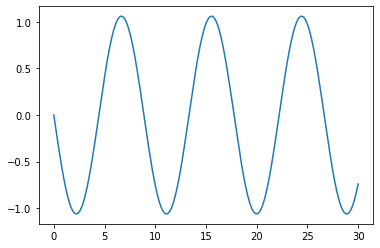

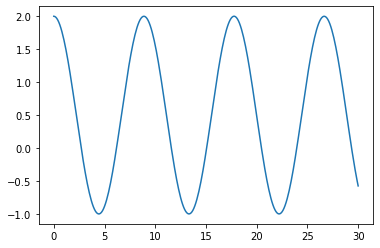

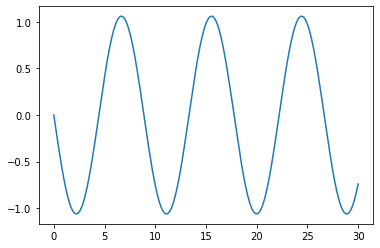

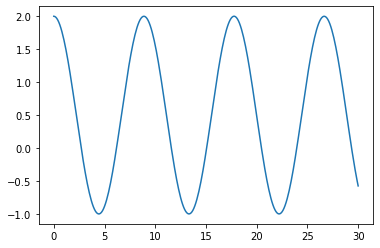

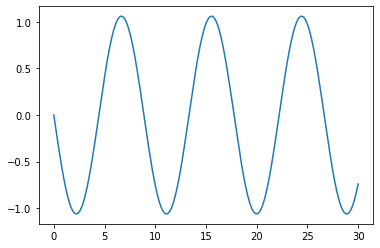

In [17]:
# Write your code here


for l_unst in np.linspace(1.0, 3.0, 5):
    sol=solve_ivp(derivs, (min(time), max(time)), [l0,v0], t_eval=time, args=[k,m,l_unst])
    
    plt.figure()
    plt.plot(soln.t, soln.y[0])
    plt.figure()
    plt.plot(soln.t, soln.y[1])

*Write your observations here for how $l$ and $v$ change when you vary $l_{\mathrm{unst}}$*

## 2. Adding in Damping

Now that we have a fun little model for our spring let’s make it a little bit more complex. Real springs don’t bounce back and forth indefinitely; instead, they will slowly die away. So! Let’s add a **damping term** that will cause the spring to not go on forever. 

To do this, we need to add another term to our equation for $\frac{dv}{dt}$. Specifically, 

$$\frac{dv}{dt} = -\frac{k}{m} (l - l_{\mathrm{unst}}) - c*v$$

Where $c$ is a damping coefficient, and $v$ is the velocity.

&#9989;&nbsp; **Using your code from the previous problem as a template, model the motion of a *damped* spring.**

Again, use your own value for $c$. Anything between 0.25 and 1.5 should be fine.

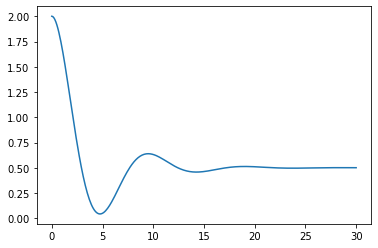

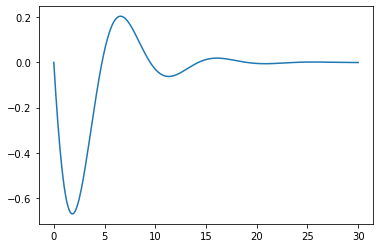

In [18]:
# Write your code here

def derivs_damping(t,curr_vals, k, m, l_unst, c):
    l, v = curr_vals
    dldt=v
    dvdt=-(k/m)*(l-l_unst)-(c*v)
    return dldt, dvdt

#parameters
k=0.5
m=1.0
l_unst=0.5
c=0.5
#initial conditions
l0=2
v0=0

init=(l0,v0)
time=np.arange(0, 30.1, .1)

#use solve_ivp

soln=solve_ivp(derivs_damping, (min(time), max(time)), init, t_eval=time, args=(k,m, l_unst,c))

l = soln.y[0,:]
v=soln.y[1,:]

plt.figure()
plt.plot(soln.t, l)

plt.figure()
plt.plot(time,v)


**QUESTION** Try out several different values for the spring constant $c$. How does $l$ change when you vary $c$? How does the velocity of the spring change? (**Note** It may be useful to overplot the motion (i.e., $l$) for different $c$ values on a single plot, so you can easily compare them).

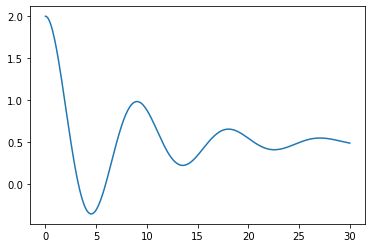

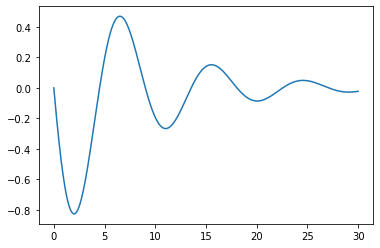

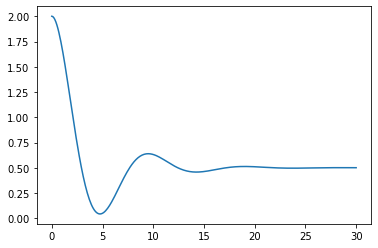

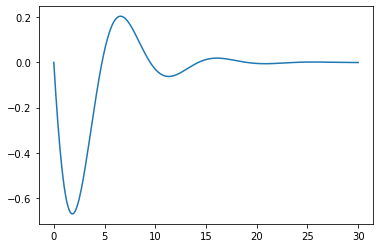

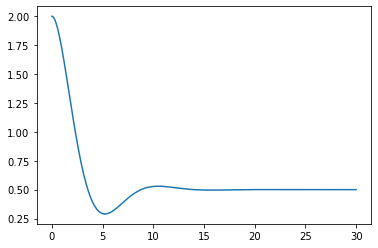

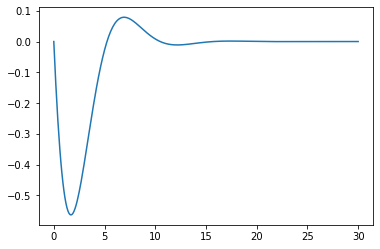

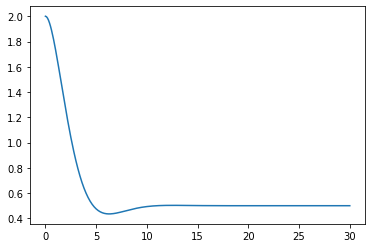

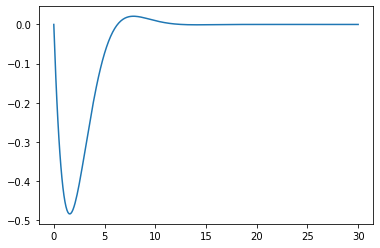

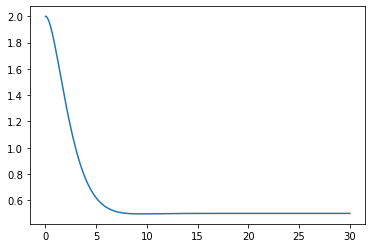

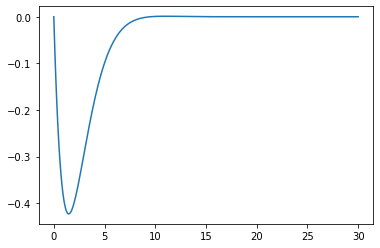

In [20]:
# Write your code here

for c in np.linspace(0.25, 1.25, 5):
    sol=solve_ivp(derivs_damping, (min(time), max(time)), [l0,v0], t_eval=time, args=[k,m,l_unst,c])
    
    plt.figure()
    plt.plot(sol.t, sol.y[0])

    
    plt.figure()
    plt.plot(time, sol.y[1])

*Write your observations here for how $l$ and $v$ change when you vary $c$*